In [3]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models import Word2Vec, KeyedVectors

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("AllBooks_baseline_DTM_Unlabelled.csv").rename(columns={'# foolishness': 'foolishness'})
df

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
to_be_removed = [word for word in df.columns.values if word in stop_words]
print(to_be_removed)

['i', 'out', 'for', 'we', 'o', 'who', 'as', 'down', 'once', 'there', 'in', 'all', 'he', 't', 'this', 'the', 'at', 's', 'such', 'just']


In [7]:
df = df.drop(to_be_removed, axis=1)
df

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


W zamianie słów na wektory użyliśmy wytrenowanego modelu word2vec. Model ten został wytrenowany na ok. 100 miliardach słów z wiadomości Google News. Zawiera on w sobie słownik ok. 3 milionów słów, z których każde przedstawione jest jako 300 wymiarowy wektor.

In [8]:
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

Przykład działania modelu word2vec.

In [9]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

Dla każdego rozdziału stworzyliśmy listę ze wszytskimi słowami które się w nim pojawiły.

In [56]:
chapters = [[] for i in range(len(df))]


for index, row in df.iterrows():
    for i in range(len(row)):
        for j in range(row[int(i)].astype(int)):
            chapters[index].append(df.columns.values[i])
    

Każdy rozdział przedstawiliśmy jako średnią jego wszystkich słów. Sposób ten jest dobry dla krótkich tekstów, wydaje nam się, że rozdziały z naszej ramki danych podlegają pod tę kategorię.

In [111]:
def vectorize(list_of_docs, model):
    number_of_errors = 0
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    number_of_errors += 1
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features, number_of_errors
    
vectorized_chapters, number_of_missing_words = vectorize(chapters, model=model)
print(f"Liczba wektorów: {len(vectorized_chapters)}, długość wektora: {len(vectorized_chapters[0])}")
print(f"Liczba słów nieobecnych w słowniku modelu: {number_of_missing_words}")

Liczba wektorów: 590, długość wektora: 300
Liczba słów nieobecnych w słowniku modelu: 0


In [81]:
def silhouette(df, i):
    if i == 1:
        model = KMeans(random_state= 0)
    elif i == 2:
        model = Birch(threshold=5)
    elif i == 3: 
        model = AgglomerativeClustering() 
    cluster_num_seq = range(2, 13)  
    scores = []
    for k in cluster_num_seq:
        model.n_clusters = k
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)
        scores.append(score)

    plt.plot(cluster_num_seq, scores, 'go-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette plot')
    plt.show()
    
def calinski_harabasz(df, i):
    if i == 1:
        visualizer = KElbowVisualizer(
        KMeans(random_state= 0), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 2:
        visualizer = KElbowVisualizer(
        Birch(threshold=5), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 3:
        visualizer = KElbowVisualizer(
        AgglomerativeClustering() , k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    else: return 
    visualizer.fit(df)       
    visualizer.show()

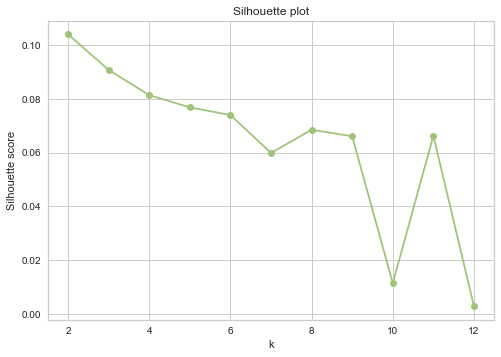

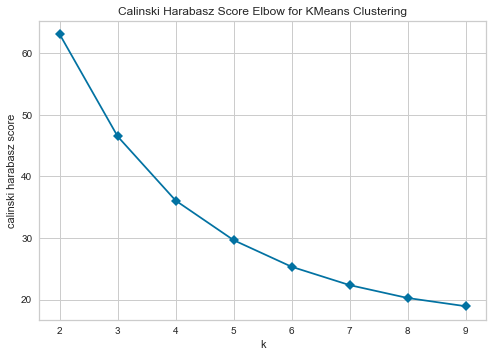

In [82]:
silhouette(vectorized_chapters, 1)
calinski_harabasz(vectorized_chapters, 1)

In [90]:
kmeans = KMeans(n_clusters=8)
y = kmeans.fit_predict(vectorized_chapters)

In [92]:
y

array([7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 4, 1, 7, 7,
       7, 7, 7, 7, 2, 6, 7, 7, 6, 2, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 2, 7,
       7, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       4, 4, 6, 6, 4, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6,
       4, 6, 3, 6, 6, 6, 2, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 4, 3, 4, 4, 4,
       5, 5, 5, 5, 2, 5, 5, 2, 4, 3, 3, 3, 5, 6, 6, 6, 6, 6, 6, 6, 3, 6,
       3, 5, 3, 2, 6, 6, 5, 5, 4, 2, 6, 3, 3, 3, 6, 3, 3, 1, 6, 6, 3, 4,
       6, 4, 2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 5, 0, 0, 1, 4, 4, 2, 1, 4, 4,
       3, 7, 6, 6, 4, 4, 6, 1, 7, 1, 7, 2, 4, 4, 4, 4, 2, 1, 4, 4, 5, 4,
       4, 4, 4, 4, 4, 6, 4, 5, 7, 4, 7, 3, 7, 4, 4, 4, 4, 5, 5, 4, 4, 5,
       4, 4, 4, 4, 1, 5, 1, 7, 7, 2, 4, 5, 5, 7, 4, 2, 4, 2, 5, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 2, 3, 4, 6, 2, 3, 4, 6, 6, 6, 5, 4, 4, 2, 5, 3,
       7, 5, 5, 1, 1, 1, 7, 1, 1, 2, 2, 7, 1, 1, 1,

Zwektoryzowaną ramkę danych zappisaliśmy w postaci pliku csv żeby móc kontynuować jej analizę w głównym notebooku.

In [102]:
vectorized_chapters
df_vectorized = pd.DataFrame(vectorized_chapters)
df_vectorized.to_csv("df_vectorized.csv", index=False)